## 4. Reconocimiento de Imágenes Sign Gestures


In [1]:
#Imports:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.decomposition import PCA

Using TensorFlow backend.
/home/gabo/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices Xtr, Ytr, correspondientes a las imágenes y etiquetas de entrenamiento,
(ii) dos matrices Xt, Yt, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos
matrices Xv, Yv, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es
decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde
el conjunto de entrenamiento original y no debe superar las 7000 imágenes.

In [2]:
def load_data():
    train = pd.read_csv('./dataset4/sign_mnist_train.csv')
    test = pd.read_csv('./dataset4/sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    X_train, X_val, y_train, y_val = train_test_split(x_tr, y_tr,test_size=0.25, random_state=42)
    return(X_train,X_val,x_t,y_train,y_val,y_t)

def plot_image(x,y):           
    f, axarr = plt.subplots(24, 10,figsize=(16,32))
    for i in range(9):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i):
                index.append(w)
        for w in range(10):
            axarr[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            axarr[i,w].axis('off')
    for i in range(9,24):
        index = []
        for w in range(len(y.as_matrix())):
            if(y.as_matrix()[w] == i+1):
                index.append(w)
        for w in range(10):
            axarr[i,w].imshow(x_t.as_matrix()[index[w]].reshape(28, 28), cmap="gray")
            axarr[i,w].axis('off')
    plt.show()

In [3]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

In [4]:
print('%s%d' %("El tamaño del conjunto x_v es: ", x_v.shape[0]))
print('%s%d' %("El tamaño del conjunto y_v es: ", y_v.shape[0]))

El tamaño del conjunto x_v es: 6864
El tamaño del conjunto y_v es: 6864


# Comentario:

Como se puede apreciar en la función load_data, se realizo una simple técnica de hold_out para separar el conjunto de prueba original en el conjunto de validación y el conjunto de prueba final, siendo este ultimo el que se utilizara para entrenar las futuras maquinas.

Además, se creo la función "plot_image" para genera una visualización de que es lo que la maquina esta recibiendo (se realizo con el conjunto de prueba por que era mas fácil identificar la etiqueta y organizar cada imagen.) la cual se puede ver a continuación.

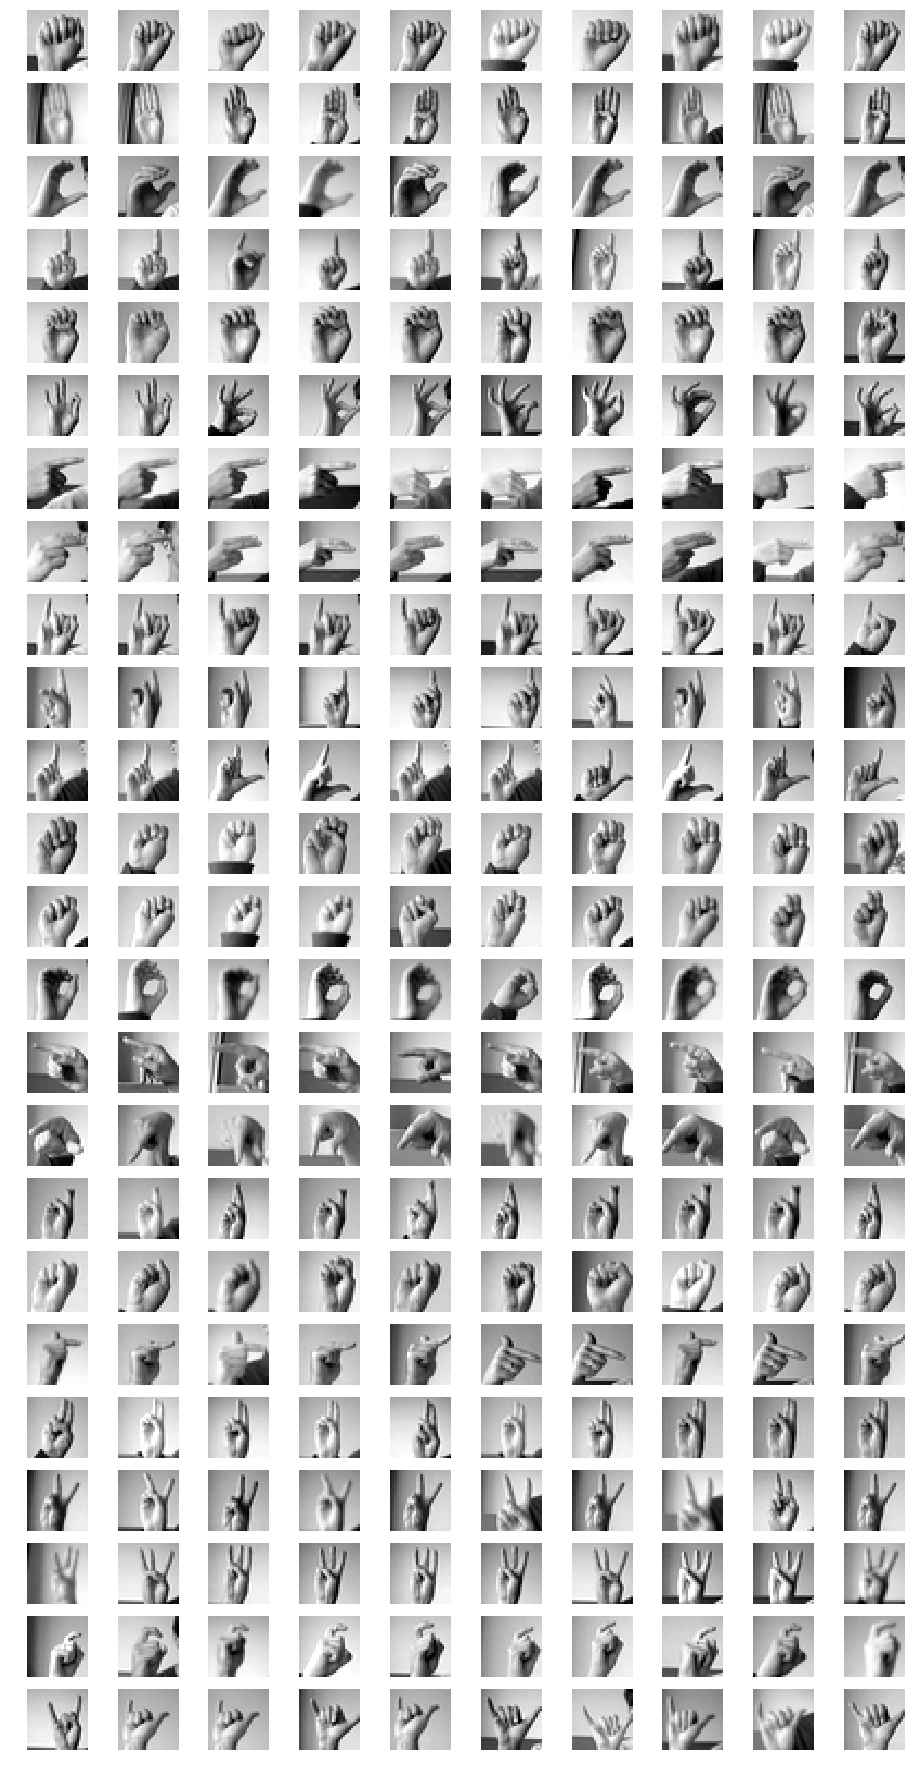

In [5]:
plot_image(x_t,y_t)

(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo
escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por 255) y luego
centrando y escalándolos como en actividades anteriores.

# Pre-procesamiento 1

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


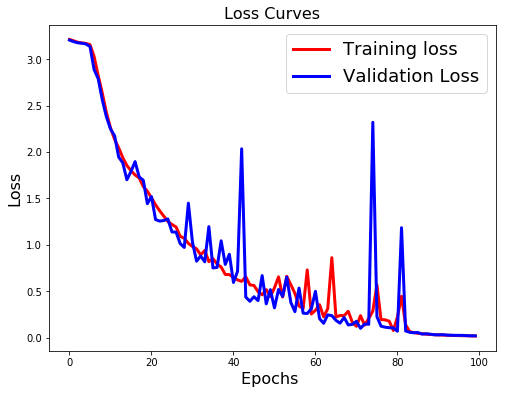

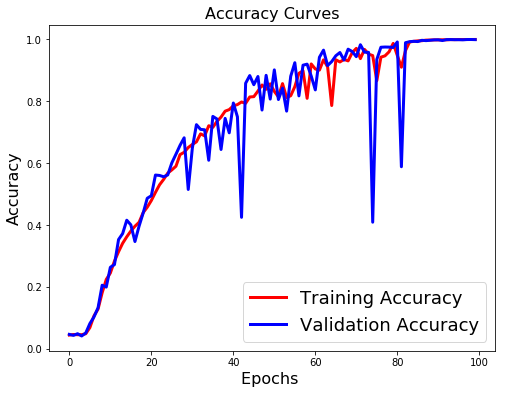

7172/7172 [==============================] - 0s 17us/step


[1.3243023420736502, 0.75404350250976016]

In [6]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 2

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if sys.path[0] == '':


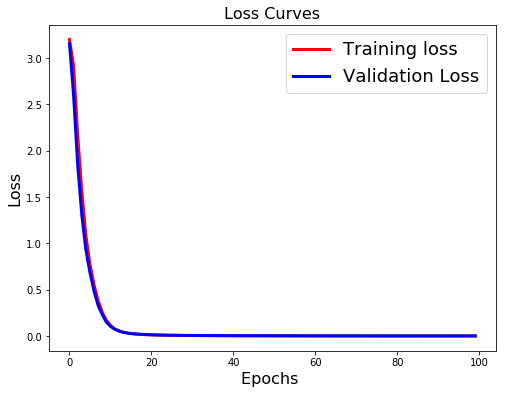

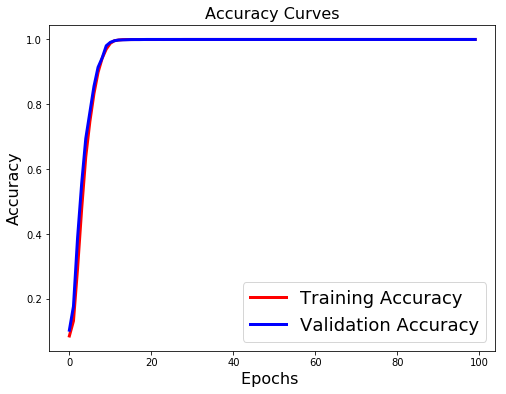

7172/7172 [==============================] - 0s 17us/step


[2.0411037340286518, 0.70050195203569432]

In [7]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 2
scaler = StandardScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 3

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if sys.path[0] == '':


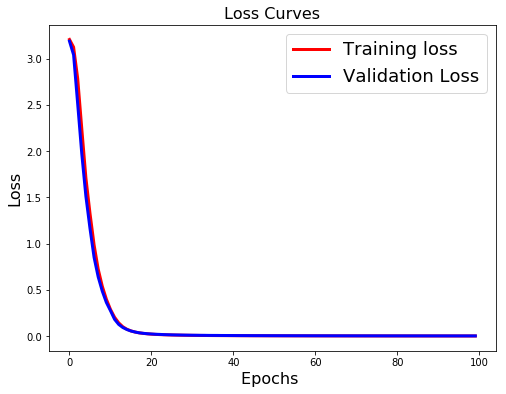

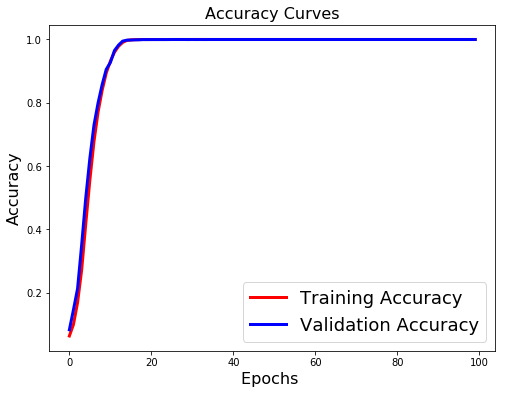

7172/7172 [==============================] - 0s 19us/step


[2.0416991132900026, 0.73020078081427775]

In [8]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 3
scaler = RobustScaler() 
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 4

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


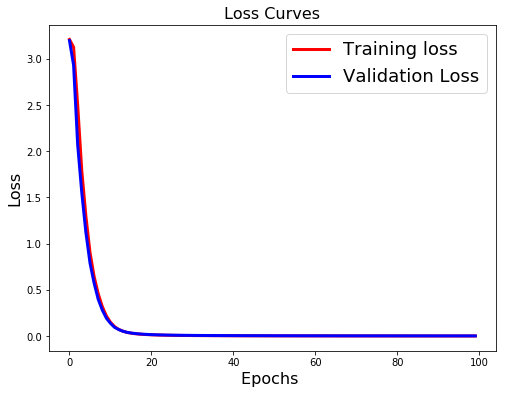

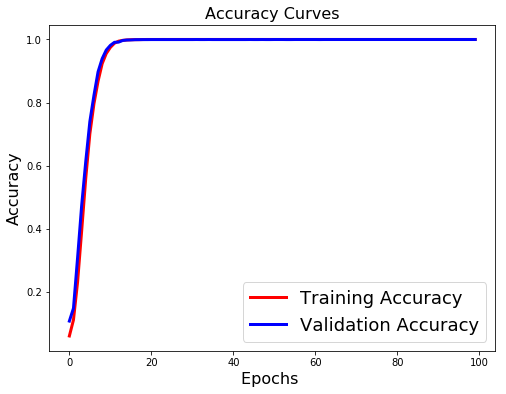

7172/7172 [==============================] - 0s 17us/step


[2.2792076701500932, 0.6822364751812604]

In [9]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 4
scaler = StandardScaler()
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 5

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


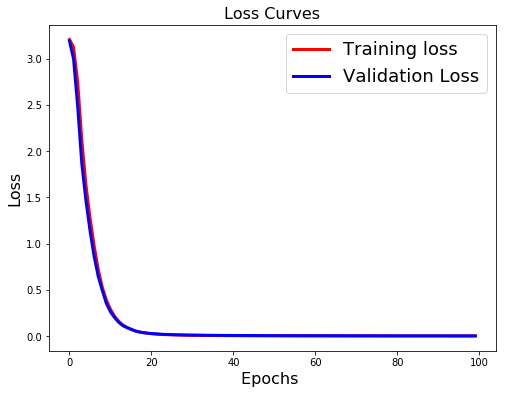

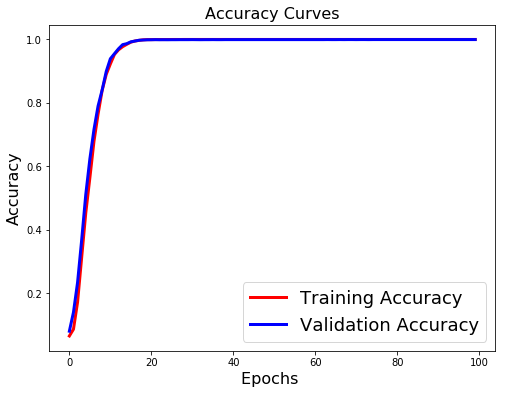

7172/7172 [==============================] - 0s 18us/step


[2.2459432388641818, 0.68070273284997207]

In [10]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 5
scaler = RobustScaler()
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
x_tr = pd.DataFrame(scaler.fit_transform(x_tr), columns = x_tr.columns)
x_v = pd.DataFrame(scaler.fit_transform(x_v), columns = x_v.columns)
x_t = pd.DataFrame(scaler.fit_transform(x_t), columns = x_t.columns)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

# Pre-procesamiento 6

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`


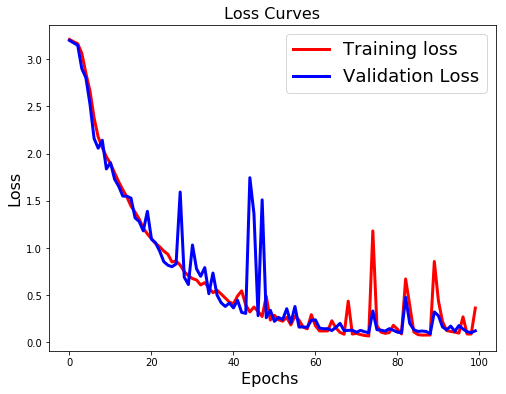

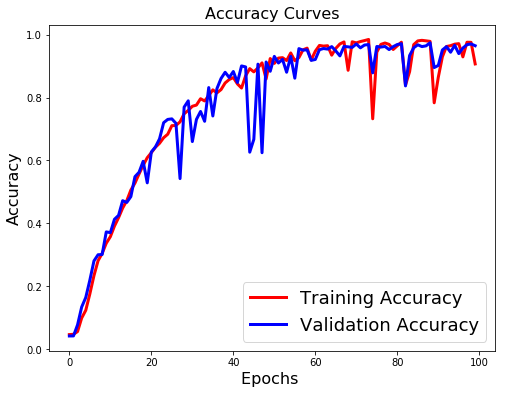

7172/7172 [==============================] - 0s 20us/step


[1.5830819525501945, 0.68809258226436143]

In [11]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
# Pre-procesamiento 
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
for i in x_tr:
    x_tr[i] = x_tr.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_tr:
    x_tr[i] = x_tr.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)
    
for i in x_v:
    x_v[i] = x_v.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_v:
    x_v[i] = x_v.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)
    
for i in x_t:
    x_t[i] = x_t.apply(lambda x: 0 if x[i] < 0.25 else x[i],axis =1)
for i in x_t:
    x_t[i] = x_t.apply(lambda x: 1 if x[i] > 0.7 else x[i],axis =1)



#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t,to_categorical(y_t))

para esta actividad, se evaluaran los siguientes pre-procesamientos:
    1. Escalando los datos de acuerdo a la intensidad máxima del pixel (dividir por 255)
    2. Escalando y centrando mediante StandarScaler()
    3. Escalando y centrando mediante RobustScaler() (Es parecida a StadarScaler() pero es mas tolerante a los outliers)
    4. Escalando los datos de acuerdo a la intensidad máxima del pixel y aplicando StandarScaler()
    5. Escalando los datos de acuerdo a la intensidad máxima del pixel y aplicando RobustScaler()
    6. Reduciendo el ruido, dándole importancia a los pixeles sobre 200 y quitándole importancia a los pixeles bajo 50

Para evaluar el desempeño de cada pre-procesamiento, se utilizo una  feed forward artificial neural network ANN y se comparo su accuracy con el conjunto de prueba, los resultados fueron los siguientes (el numero representa el pre-procesamiento):
    1. 75%
    2. 70%
    3. 68%
    4. 69%
    5. 69%
    6. 70%
  
Como podemos ver, el mejor resultado lo tubo el escalamiento de los datos de acuerdo a la intensidad máxima, por lo cual se seguira usando este modelo en las siguientes actividades.

Los demás pre-procesamiento a pesar de ser peores, se destaca que la estandarización suaviza la curva de loss function y de accuracy y al intentar disminuir el ruido generado en las fotos (pre-procesamiento 6), se encuentra un pick al ocupar el set de validación.  

Por lo cual la conclusión es que solamente dividiendo por 255 es una buena practica y realizar la división con una estandarización es lo mismo que solamente estandarizar y como los mejores resultados se consiguieron solamente dividiendo por 255 se utilizara en las siguientes actividades.

(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las
imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a 0.2.

In [12]:
#Funcion que construye la red neuronal
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='softmax'))
    
    return model

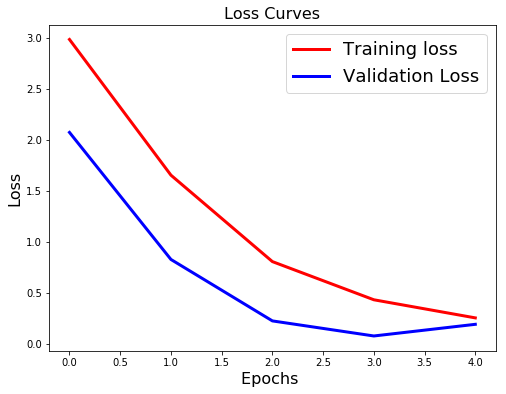

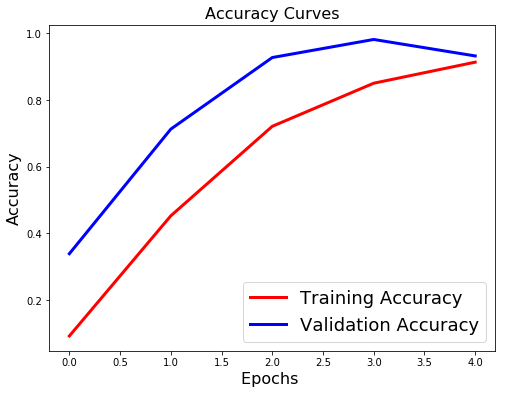

7172/7172 [==============================] - 5s 687us/step


[0.44576525427214075, 0.84397657557166761]

In [13]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)
X_train = x_tr.as_matrix().reshape(x_tr.shape[0], 28, 28, 1)
X_val = x_v.as_matrix().reshape(x_v.shape[0], 28, 28, 1)
X_test = x_t.as_matrix().reshape(x_t.shape[0], 28, 28, 1)
#CNN
model_CNN = createModel()
model_CNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_CNN.fit(X_train, to_categorical(y_tr),batch_size=128,epochs=5 , verbose=0,validation_data=(X_val,to_categorical(y_v)))


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model_CNN.evaluate(X_test,to_categorical(y_t))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


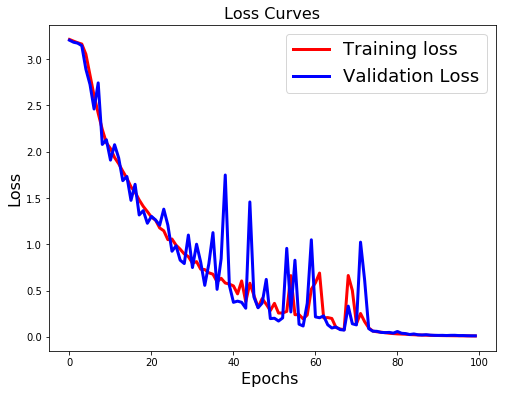

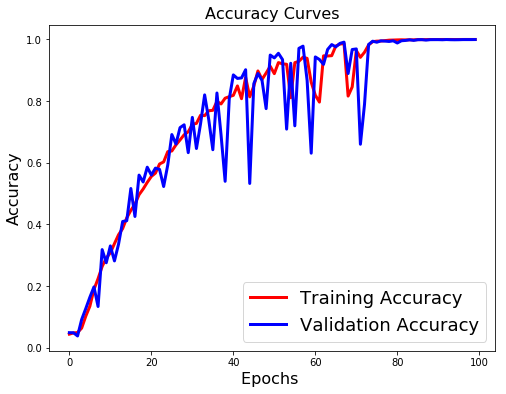

7172/7172 [==============================] - 0s 22us/step


[1.4389273246705565, 0.72267150027886229]

In [14]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#Modelo original del ayudante
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t.values,to_categorical(y_t))

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_dim=784, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1425, activation="tanh", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(794, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="tanh", kernel_initializer="uniform")`
  
/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/i

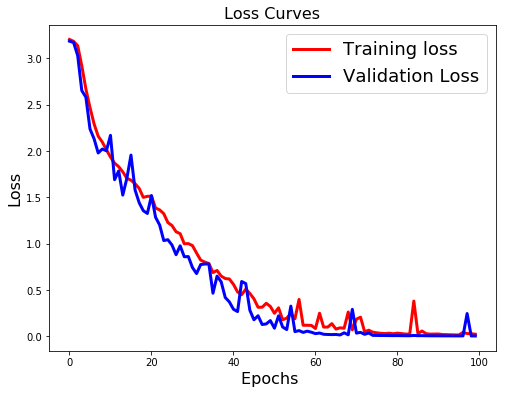

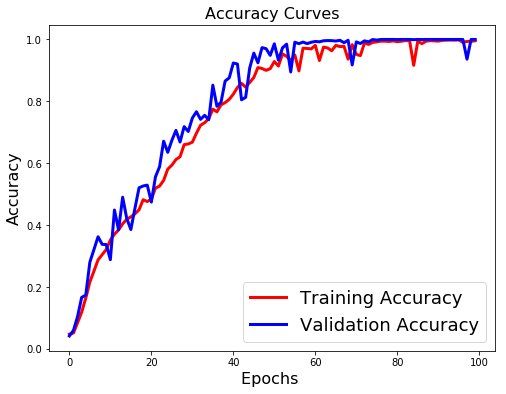

7172/7172 [==============================] - 3s 385us/step


[0.86958201043203898, 0.81413831567205797]

In [15]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#modelo en forma de "tubo", se ira reduciendo las neuronas a la mitad en cada capa
model = Sequential()
model.add(Dense(2500, input_dim=x_tr.shape[1], init='uniform', activation='tanh'))
model.add(Dense(1425, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(794, init='uniform', activation='tanh'))
model.add(Dense(392, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(196, init='uniform', activation='tanh'))
model.add(Dense(98, init='uniform', activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(49, activation='tanh'))
model.add(Dense(25, activation='tanh'))

model.add(Dense(25, init='uniform', activation='softmax'))




model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_tr.values, to_categorical(y_tr), batch_size=128, epochs=100,verbose=0,validation_data=(x_v.values,to_categorical(y_v)))


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

model.evaluate(x_t.values,to_categorical(y_t))

# Comentario:

Se realizaron los siguientes experimentos en base al codigo original:

1) Cambiar solamente la funcion  de activación, provando tanto sigmoid como tanh. El resultado fue empeorar el accuracy del validation sample al rededor de un 50%.

2) Se vario tanto la cantidad de valores a ocupar en cada iteración para el entrenamiento y la cantidad de veces que se entrena la red. El resultado fue empeorar la función hasta un 20% de accuracy.

3) Se agregaron mas capas repitiendo las ultimas 2 capas del codigo base. Se aumento ligeramente el accuracy cada vez que se agregaban mas capas.

4) Despues de investigar un poco, encontramos que para el caso de imagenes centradas, una buena aproximación es pensar la red como un cono, en el cual se reduce la cantidad de neuronas por capa a la mitad de la anterior. Usando esto de información y con los resultados de la prueba N°3, decidimos aumentar el numero de capas y decrecer el numero de neuronas partiendo en 2500. Se incremento el accuracy hasta un 74%, mejorando el resultado base.

5) Finalmente, se agregaron capas de Dropout para intentar evitar el overfitting en la red entrenada, se eligio un valor del 0.5 solamente leyendo la documentación de keras. Se logro mejorar el accuracy hasta un 81%, cumpliendo con los valores requeridos.

Esto demuestra que al agregar capas intermedias mejoramos cada vez mas el score siempre y cuando se haga inteligentemente y el dropout ayuda a no overfitear tanto la maquina generándose mejores resultado al usar el sample test.

Finalmente queremos destacar que se implemento una convolutional neural network la cual esta diseñada para el procesamiento de imagenes, para utilizarla re ajustamos los pixeles a una imagen de 28x28 y con capas muy basicas de una CNN se logro obtener un resultado del 95% de accuracy. Por otro lado, la CNN tiene un gran overfitting al observar los graficos generados al entrenar la red. Para solucionar este problema, seria interesante aplicar Data Augmentation, generando imagenes no centradas o invertidas.

(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para
asi visualizar cuáles son las clases más difíciles de clasificar y con cuáles se confunden. Comente.

In [16]:
yhat_test = model.predict_classes(x_t)

In [17]:
target_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
print(classification_report(y_t,yhat_test,target_names = target_names))

             precision    recall  f1-score   support

          a       0.84      1.00      0.91       331
          b       1.00      0.91      0.95       432
          c       0.90      1.00      0.95       310
          d       0.93      1.00      0.96       245
          e       0.91      1.00      0.95       498
          f       0.99      0.83      0.90       247
          g       0.92      0.71      0.80       348
          h       0.91      0.91      0.91       436
          i       0.77      0.62      0.68       288
          k       0.74      0.55      0.63       331
          l       0.84      0.99      0.91       209
          m       0.77      0.74      0.75       394
          n       0.62      0.60      0.61       291
          o       0.91      0.78      0.84       246
          p       0.97      0.94      0.95       347
          q       0.68      0.87      0.76       164
          r       0.62      0.72      0.66       144
          s       0.72      0.63      0.67   

Confusion matrix, without normalization
Normalized confusion matrix


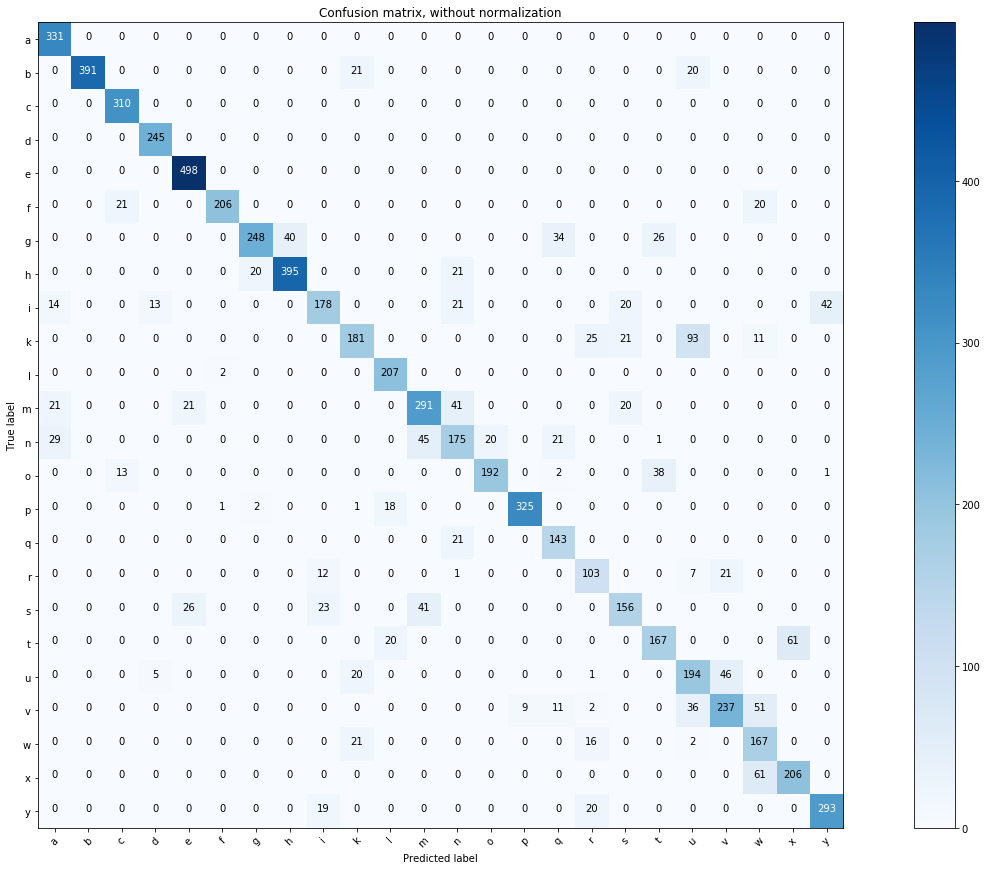

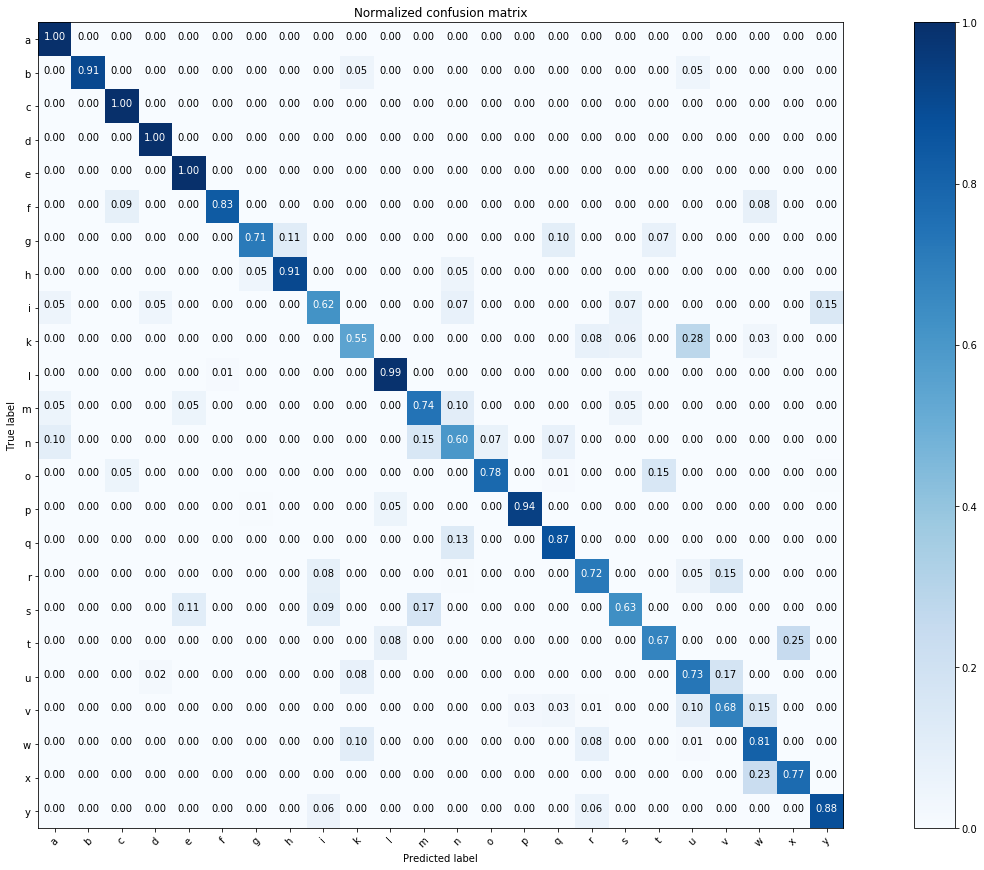

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    plt.figure(figsize=(20,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_t,yhat_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, target_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, target_names, normalize=True,title='Normalized confusion matrix')

plt.show()

# Comentario:

Como se puede apreciar, existe una alta confusión con las letras M, S y N ya que las 3 letras se forman con el puño y levantando ciertos dedos en especifico, lo que en términos matriciales podría significar de una pequeña diferencia numérica, confundiendo a la maquina.
Con respecto a K, la maquina puede tener a confundirse por la existencia de profundidad en las imágenes. Esta profundidad esta representada aproximadamente por la cantidad de pixeles negros, por lo cual la maquina puede tener un bajo accuracy a causa de esto. También, otra causa de esta confusión es que las maquinas feed forward no se comportan bien cuando la imagen no esta centrada, y como podemos ver las imágenes presentadas al principio del informe, la letra K no siempre esta centrada, aumentando el error en la predicción.
W, V, U y R tienden a confundirse entre si, esto es causado por que la mayoría de las imágenes son de la mano en la misma posición, levantando 2 dedos iguales en distintas posiciones para el caso de U, V y R mientras que W se puede parecer mucho a V ya que es solamente un dedo mas levantado. Esto puede confundir a la maquina por la pequeñas diferencias generándose un pequeño error entre al definir cada 1.
X y T también tienden a confundirse en un pequeño grado. Nuestra conclusión de por que pasa esto es por que la maquina tiende a dar mas peso a los 3 dedos juntos en ves de los que están apuntando a algo, llevando a la confusión.

(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función
de kernel a utilizar.

In [3]:
def SVM_tarea3(kernel,x_tr, x_v, x_t, y_tr, y_v , y_t): 
    error_train = []
    error_test = []
    error_val = []
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):            
        model = SVM()
        model.set_params(C=param,kernel=kernel)
        model.fit(x_tr,y_tr)          
        
        yhat_train = model.predict(x_tr)
        yhat_test = model.predict(x_t)
        yhat_val = model.predict(x_v)
        
        
        error_train.append(1-accuracy_score(y_tr, yhat_train))
        error_test.append(1-accuracy_score(y_t, yhat_test))
        error_val.append(1-accuracy_score(y_v, yhat_val))


    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento ')
    plot.plot(pasos, error_test, label='Error de Prueba')
    plot.plot(pasos, error_val, label='Error de Validación ')
    plt.legend()
    plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()

In [19]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255.0,axis = 1)
x_v = x_v.apply(lambda x: x/255.0,axis = 1)
x_t = x_t.apply(lambda x: x/255.0,axis = 1)

# Con datos pre-procesados
model= SVM()
model.set_params(kernel='rbf')
model.fit(x_tr,y_tr)
yhat_SVM_train = model.predict(x_tr)
yhat_SVM_validation = model.predict(x_v)
yhat_SVM_test = model.predict(x_t)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_tr, yhat_SVM_train)))
print("Miss Classification Error Validation SVM: %f"%(1-accuracy_score(y_v, yhat_SVM_validation)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_t, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.194551
Miss Classification Error Validation SVM: 0.213287
Miss Classification Error Test SVM: 0.345929


In [20]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

#datos sin pre-procesar
model= SVM()
model.set_params(kernel='rbf')
model.fit(x_tr,y_tr)
yhat_SVM_train = model.predict(x_tr)
yhat_SVM_validation = model.predict(x_v)
yhat_SVM_test = model.predict(x_t)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_tr, yhat_SVM_train)))
print("Miss Classification Error Validation SVM: %f"%(1-accuracy_score(y_v, yhat_SVM_validation)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_t, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.000000
Miss Classification Error Validation SVM: 0.777389
Miss Classification Error Test SVM: 0.979922


In [4]:
%%capture output
#Cuidado con correr esto, tarda demasiado
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

SVM_tarea3('rbf',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('poly',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('sigmoid',x_tr, x_v, x_t, y_tr, y_v , y_t)

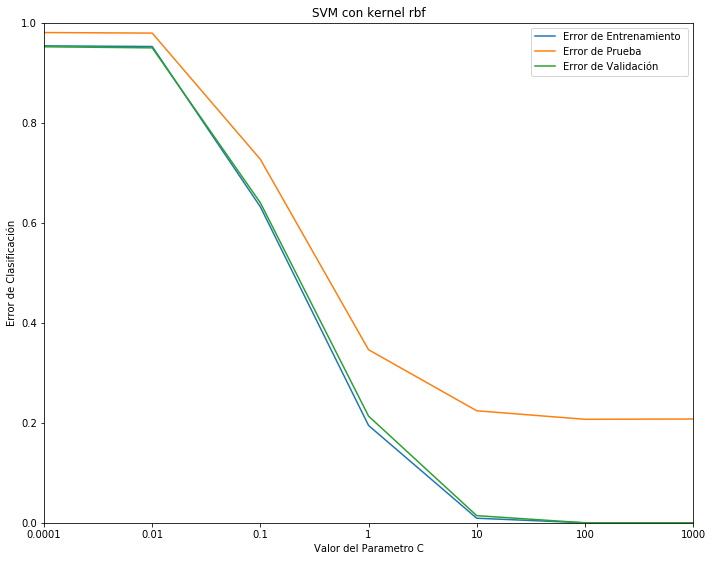

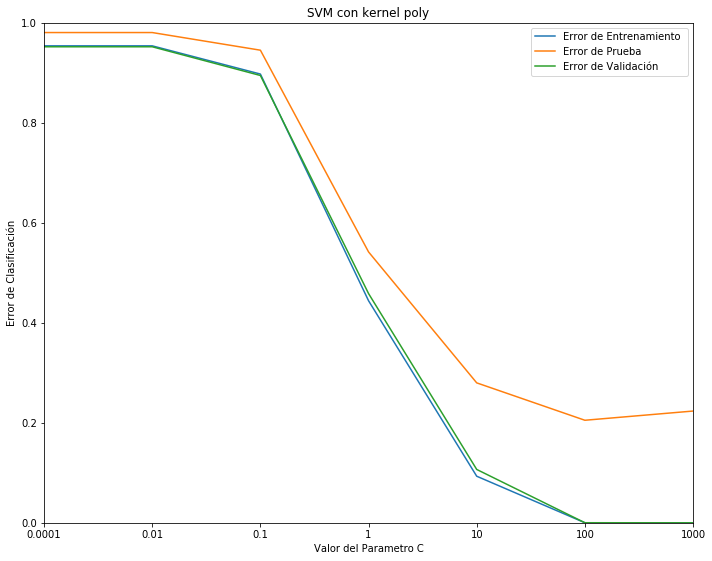

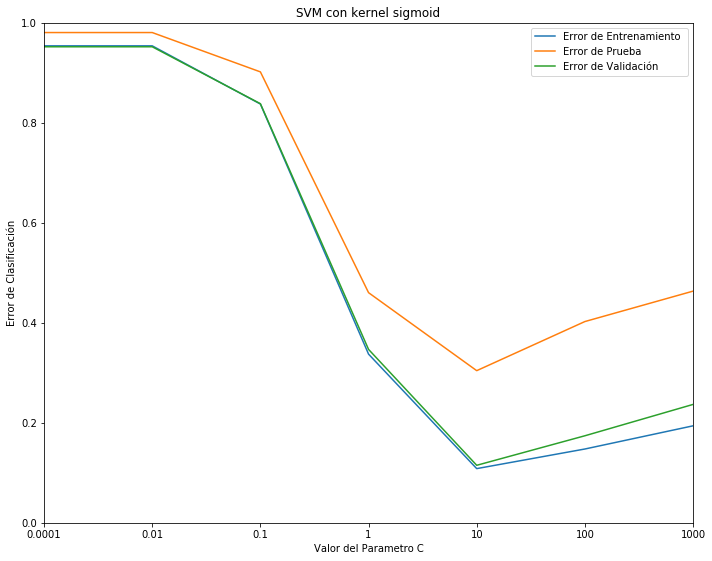

In [5]:
output.show()

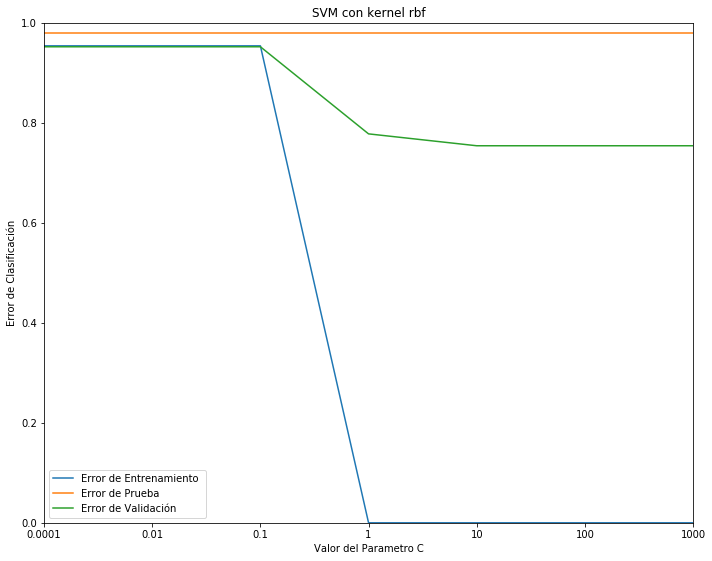

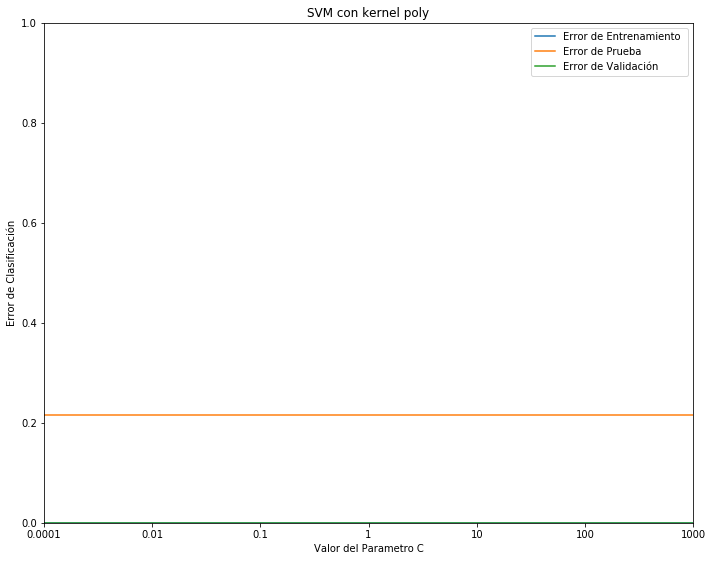

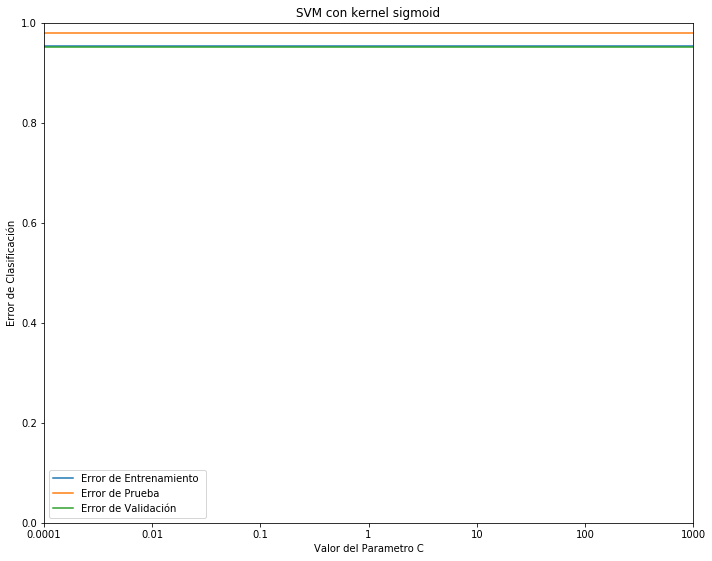

In [7]:
#Cuidado con correr esto, tarda demasiado
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

SVM_tarea3('rbf',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('poly',x_tr, x_v, x_t, y_tr, y_v , y_t)
SVM_tarea3('sigmoid',x_tr, x_v, x_t, y_tr, y_v , y_t)

# Comentario:

como se puede apreciar, SVM sin procesamiento tiene un comportamiento horrible incluso si incluimos un parametro de regularización, incluso se puede apreciar que con kernel rbf un dataset no regularizado llega al 0% de error con el set de prueba pero a un 100% de error con el test, lo que indica que esta sumamente overfiteado. Por otro lado al usar parametro ya pre-procesados, el comportamiento de la maquina es mas próximo a lo que ya conocemos, donde un buen nivel de regularización esta aproximadamente en un valor de C = 10 ya que despues de eso la maquina tiende a estar overfiteada o tener peores resultados.
Quisiéramos destacar el tiempo que tardan las maquinas en entrenarse, que es sumamente alto por la cantidad de dimensiones resultados posibles.

(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

In [24]:
def TREE_tarea3(minimo, maximo,criterio,x_tr, x_v, x_t, y_tr, y_v , y_t):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_val = []
    
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(x_tr,y_tr)
        yhat_train = model.predict(x_tr)
        yhat_test = model.predict(x_t)
        yhat_val = model.predict(x_v)
        error_train.append(1-accuracy_score(y_tr, yhat_train))
        error_test.append(1-accuracy_score(y_t, yhat_test))
        error_val.append(1-accuracy_score(y_v, yhat_val))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento')
    plot.plot(profundidad, error_test, label='Error de Prueba')
    plot.plot(profundidad, error_val, label='Error de Validación ')
    plt.legend()
    plt.xlabel('Profundidad del Árbol')
    plt.ylabel('Error de Clasificación')
    plt.title('Árbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()

In [21]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

#con Datos pre-procesados
model= Tree()
model.set_params(max_depth=11,criterion='gini',splitter='best')
model.fit(x_tr,y_tr)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

model= Tree()
model.set_params(max_depth=11,criterion='entropy',splitter='best')
model.fit(x_tr,y_tr)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("\n")
print("Entropy:")
print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

Miss Classification Error Train TREE: 0.271769
Miss Classification Error Validation TREE: 0.339744
Miss Classification Error Test TREE: 0.630926


Entropy:
Miss Classification Error Train TREE: 0.089359
Miss Classification Error Validation TREE: 0.185023
Miss Classification Error Test TREE: 0.563859


In [22]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

#Datos sin pre-procesados
model= Tree()
model.set_params(max_depth=11,criterion='gini',splitter='best')
model.fit(x_tr,y_tr)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("Gini")
print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

model= Tree()
model.set_params(max_depth=11,criterion='entropy',splitter='best')
model.fit(x_tr,y_tr)
yhat_TREE_train = model.predict(x_tr)
yhat_TREE_validation = model.predict(x_v)
yhat_TREE_test = model.predict(x_t)

print("\n")
print("Entropy:")
print("Miss Classification Error Train TREE: %f"%(1-accuracy_score(y_tr, yhat_TREE_train)))
print("Miss Classification Error Validation TREE: %f"%(1-accuracy_score(y_v, yhat_TREE_validation)))
print("Miss Classification Error Test TREE: %f"%(1-accuracy_score(y_t, yhat_TREE_test)))

Gini
Miss Classification Error Train TREE: 0.271769
Miss Classification Error Validation TREE: 0.339307
Miss Classification Error Test TREE: 0.630229


Entropy:
Miss Classification Error Train TREE: 0.089408
Miss Classification Error Validation TREE: 0.180798
Miss Classification Error Test TREE: 0.564138


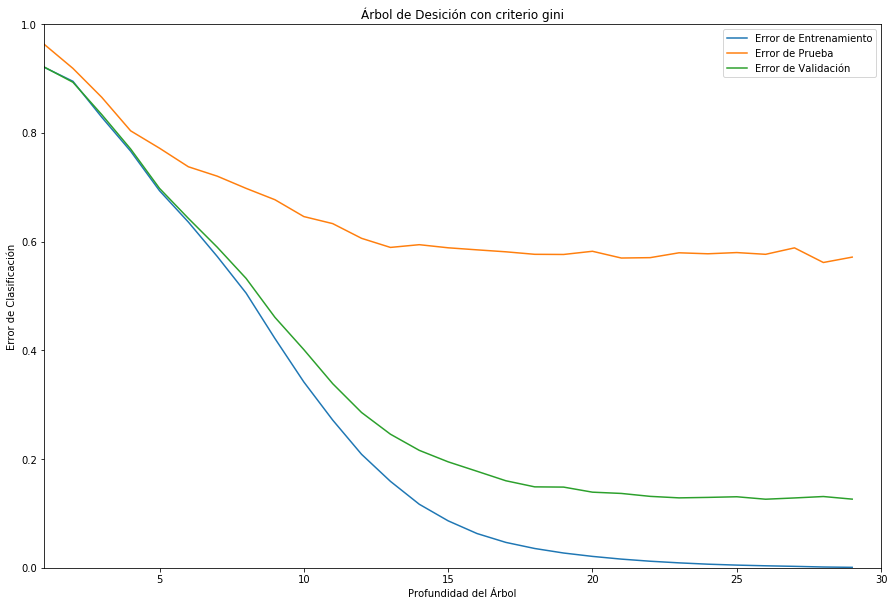

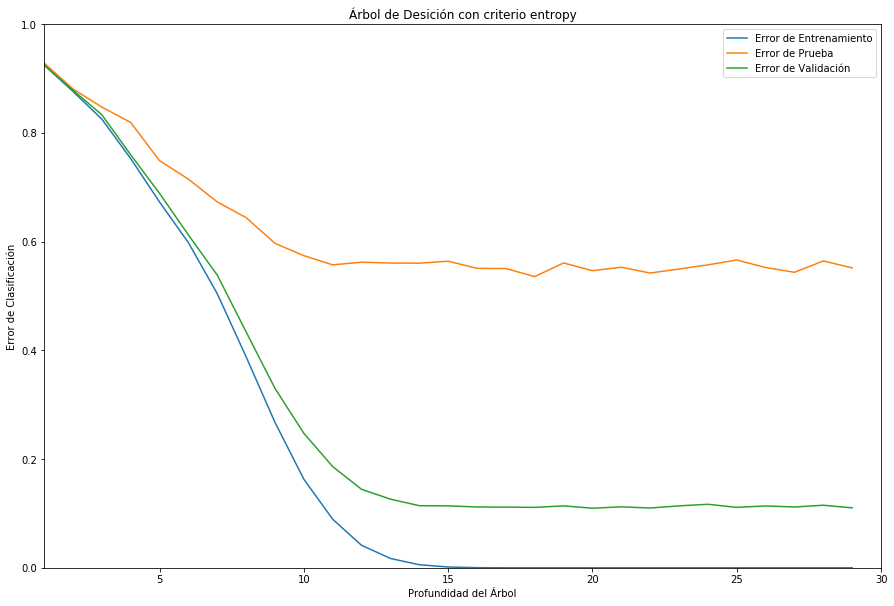

In [18]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()
#pre-procesamiento 1
x_tr = x_tr.apply(lambda x: x/255.0,axis = 1)
x_v = x_v.apply(lambda x: x/255.0,axis = 1)
x_t = x_t.apply(lambda x: x/255.0,axis = 1)
#Arboles con Pre-procesamiento
TREE_tarea3(1,30,'gini',x_tr, x_v, x_t, y_tr, y_v , y_t)
TREE_tarea3(1,30,'entropy',x_tr, x_v, x_t, y_tr, y_v , y_t)

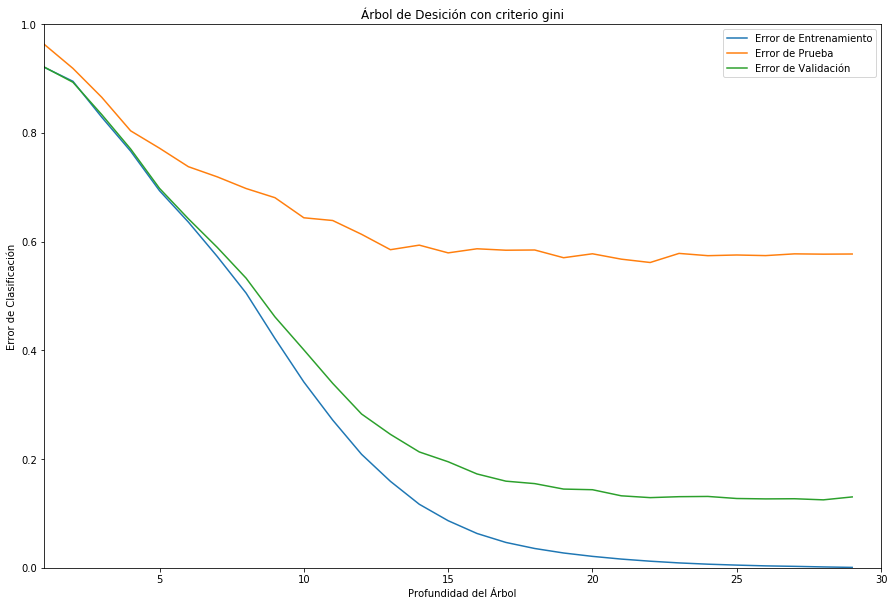

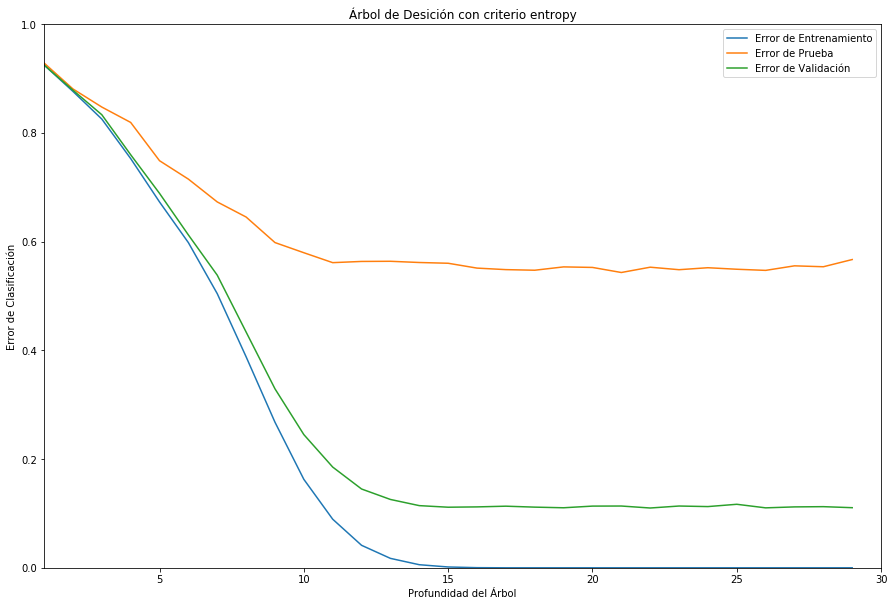

In [19]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

#Arboles sin Pre-procesamiento
TREE_tarea3(1,30,'gini',x_tr, x_v, x_t, y_tr, y_v , y_t)
TREE_tarea3(1,30,'entropy',x_tr, x_v, x_t, y_tr, y_v , y_t)

# Aplicando PCA para reducir la dimensionalidad de los pixeles menos representativos

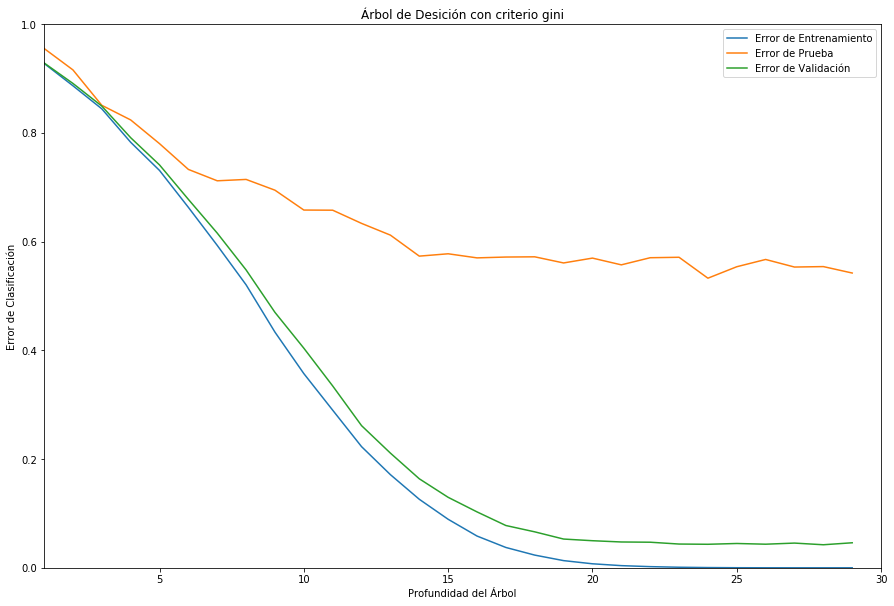

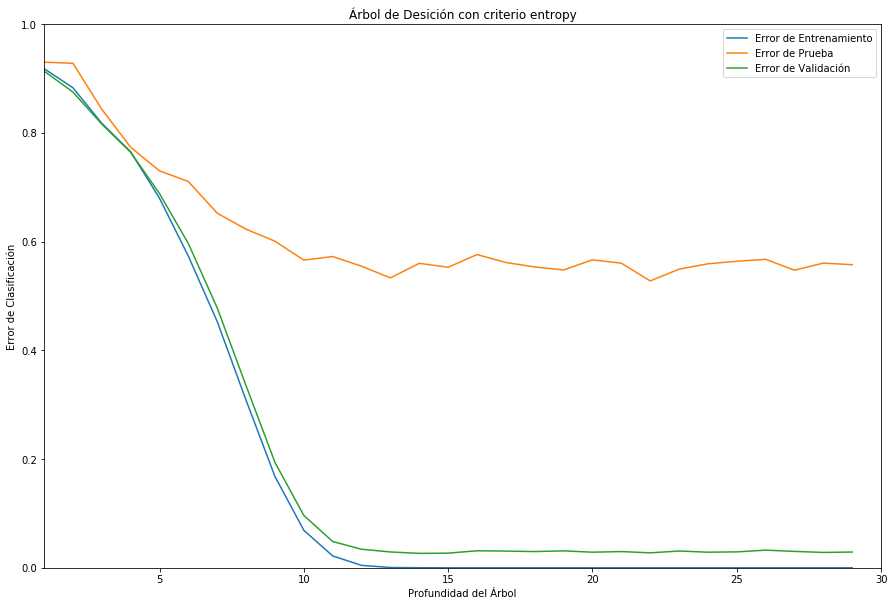

In [32]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

d = 50
pca_model = PCA(n_components=d)
pca_model.fit(x_tr)
X_pca_train = pca_model.transform(x_tr)
X_pca_val = pca_model.transform(x_v)
X_pca_test = pca_model.transform(x_t)

TREE_tarea3(1,30,'gini',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)
TREE_tarea3(1,30,'entropy',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)

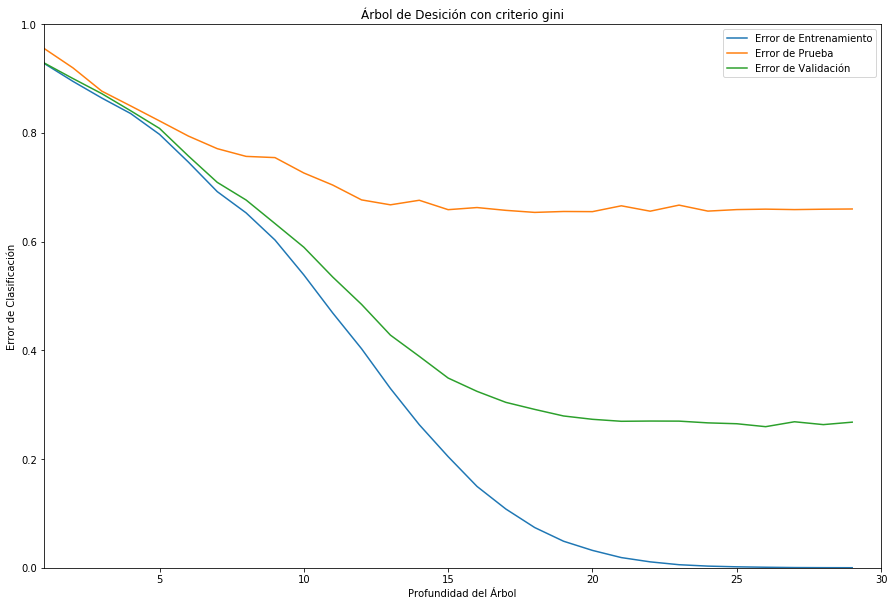

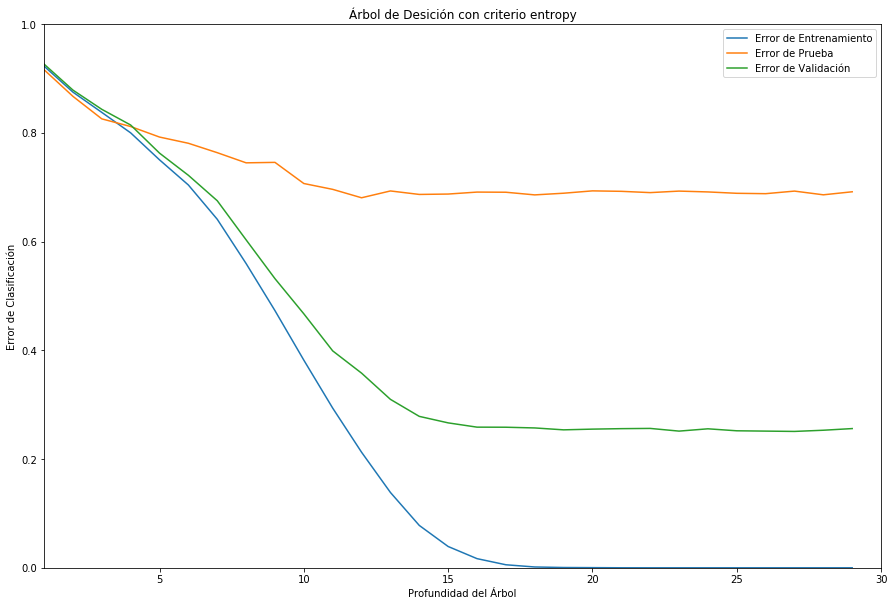

In [30]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

d = 5
pca_model = PCA(n_components=d)
pca_model.fit(x_tr)
X_pca_train = pca_model.transform(x_tr)
X_pca_val = pca_model.transform(x_v)
X_pca_test = pca_model.transform(x_t)

TREE_tarea3(1,30,'gini',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)
TREE_tarea3(1,30,'entropy',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)

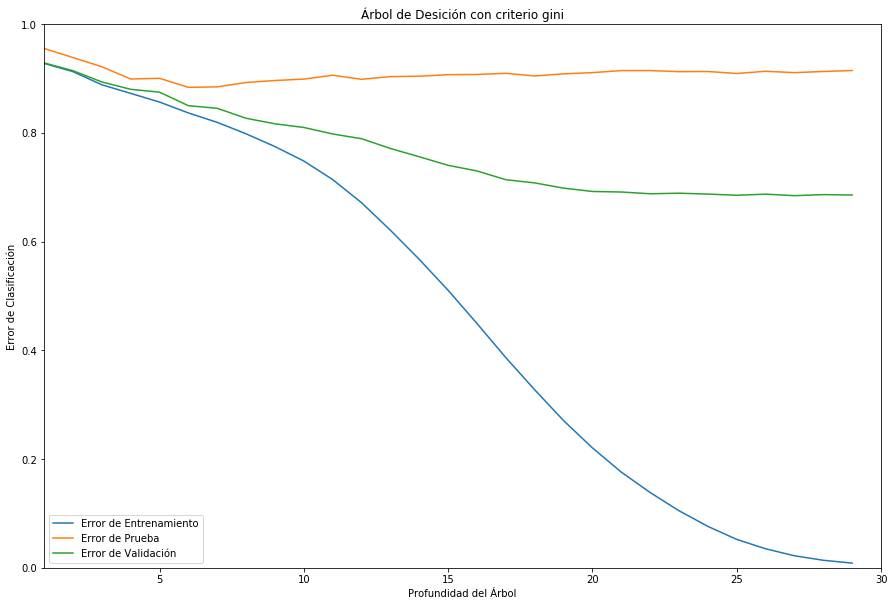

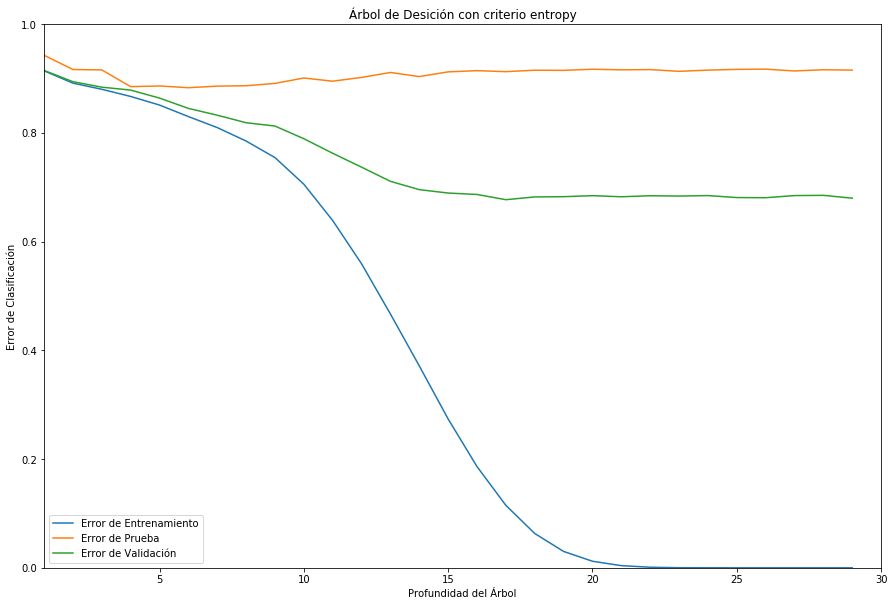

In [31]:
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

x_tr = x_tr.apply(lambda x: x/255,axis = 1)
x_v = x_v.apply(lambda x: x/255,axis = 1)
x_t = x_t.apply(lambda x: x/255,axis = 1)

d = 2
pca_model = PCA(n_components=d)
pca_model.fit(x_tr)
X_pca_train = pca_model.transform(x_tr)
X_pca_val = pca_model.transform(x_v)
X_pca_test = pca_model.transform(x_t)

TREE_tarea3(1,30,'gini',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)
TREE_tarea3(1,30,'entropy',X_pca_train, X_pca_val, X_pca_test, y_tr, y_v , y_t)

# Comentario:

En esta parte de la tarea ocurre que para ambos tipos de arboles de clasificación (gini y entropy) y ademas con ambos tipos de dataset (pre-procesado y sin pre-procesar) se obtienen resultados sumamente similares, desde una profundidad de 11 aproximadamente los arboles con criterio de entropía estancan su error de prueba, mientras que los con criterio gini se estacan aproximadamente en una profundidad de 13 (lo cual no es mucha diferencia). Otra coincidencia, es que ambos dataset y algoritmos tienden a acotar y estancar su error al 60% aproximadamente (a pesar de que entropy tiende a tener un mejor desempeño ligeramente). Incluso al hacer una disminución de dimensionalidad se empeoraron los datos, por lo cual la conclusión de todos estos fenómenos se debe a la gran existencia de features importantes y a sus pesos, es decir, al existir muchas features importantes y por las propiedades del árbol de clasificación de ir haciendo cortes bruscos y reduciendo el dataset, solamente se puede reducir el error hasta cierto punto, ya que mas allá de esto es imposible por las propiedades del dataset.